# Synthetic Domain Examples #

In this notebook, we will use an example in the synthetic domain along with 

Create the synthetic domain MDP graph

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import pygraphviz as pgv
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [25,25]


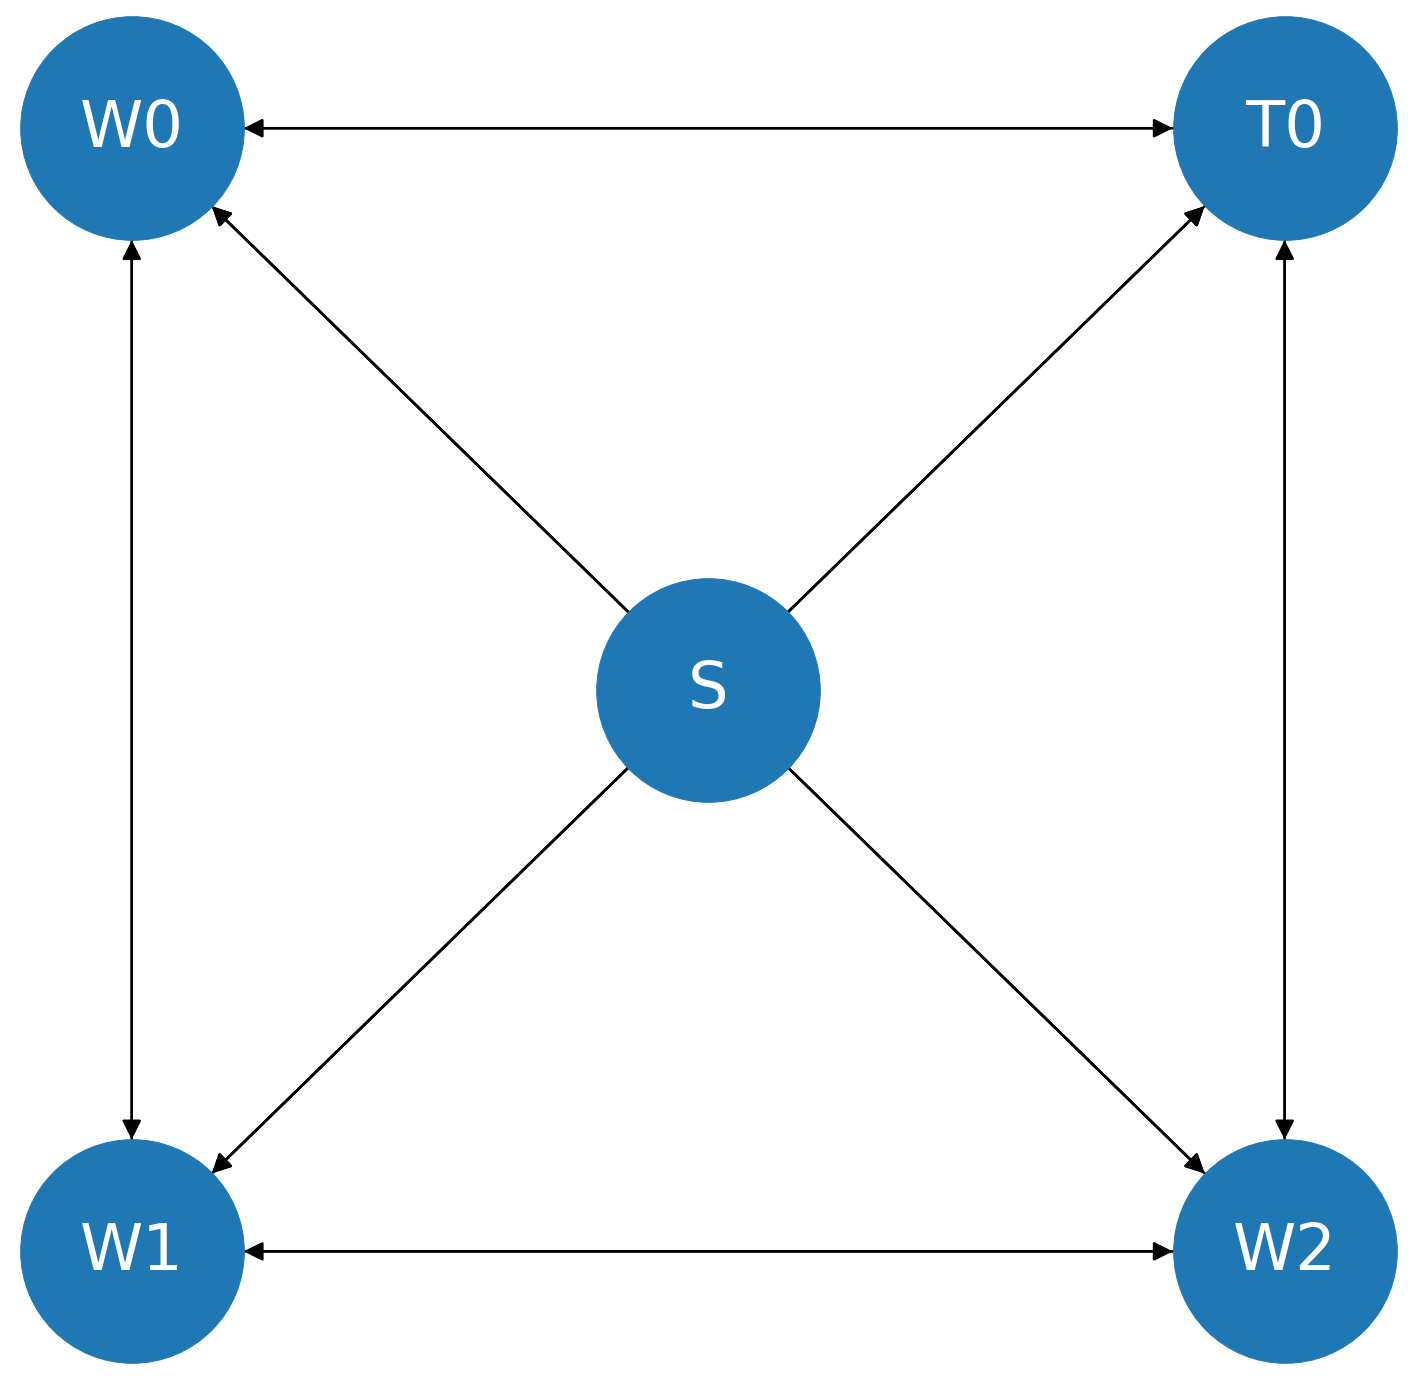

In [59]:
G = nx.DiGraph()
G.add_node('S')
G.add_node('T0')
G.add_node('W0')
G.add_node('W1')
G.add_node('W2')

a = ['T0','W0','W1','W2']
for v in ['T0','W0','W1','W2']:
    G.add_edge('S',v)
    
from itertools import product
for (u,v) in product(a,a):
    if u!=v:
        G.add_edge(u,v)

pos = nx.drawing.nx_agraph.graphviz_layout(G,prog='twopi')
nx.draw_networkx(G, pos, with_labels=True, node_size = 50000, font_size = 64, font_color='w', width = 2.5, arrowsize=40)
edge2actions = dict([((u,v),c) for (u,v,c) in G.edges.data('label')])
#_ = nx.draw_networkx_edge_labels(G, pos, edge2actions, font_size = 24)
plt.box(False)
f = plt.gcf()
f.savefig('task.pdf', bbox_inches='tight')


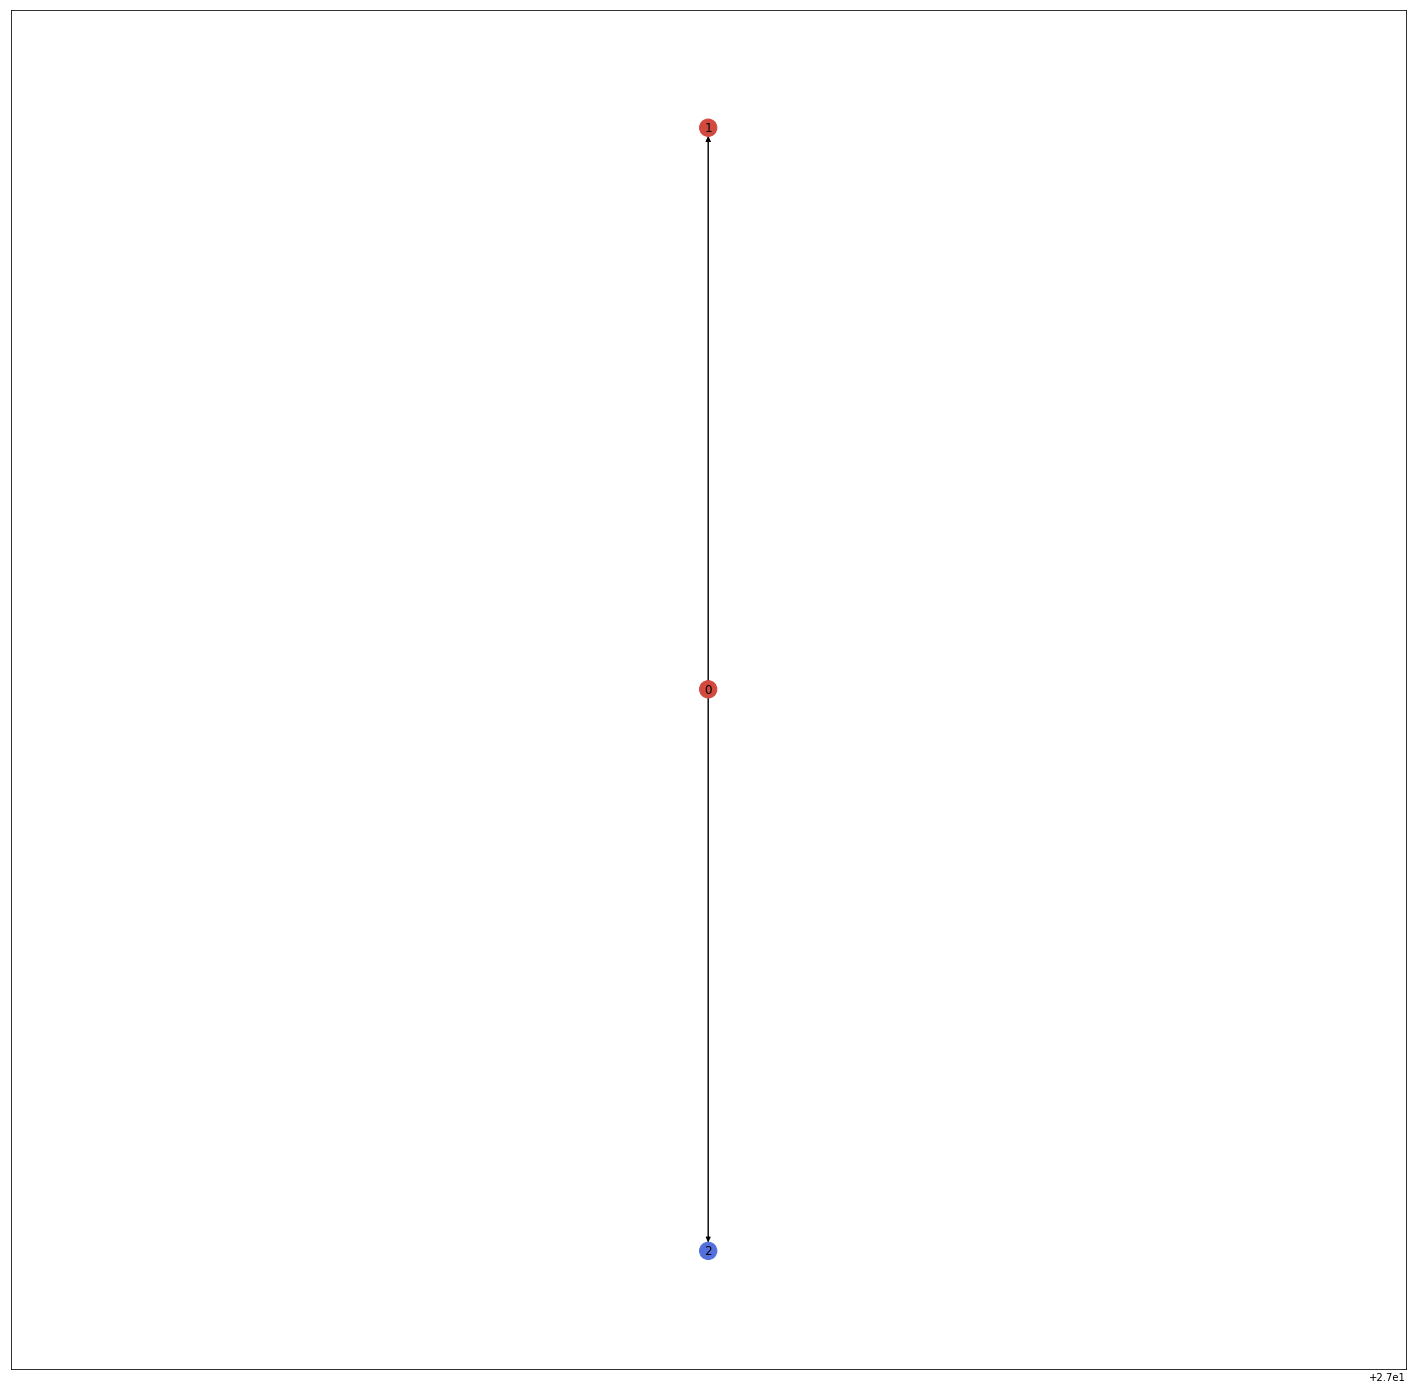

In [60]:
from utils import *
from LearningAgents import *
MDP = {}
MDP['map'], fsm, cmdp = CreateSpecMDP3(reward_type = 'map')
fsm.visualize()
q_agent = {}
stoch_eval = {}

In [61]:
q_agent['map'] = QLearningAgent(MDP['map'])
q_agent['map'].explore(episode_limit = 1000, verbose=True)
stoch_eval['map'] = ExplorerAgent(MDP['map'], input_policy=q_agent['map'].create_learned_softmax_policy(0.02))
stoch_eval['map'].explore(episode_limit = 1000, verbose=True)
#stoch_eval['map'].visualize_exploration(prog='twopi')


Training episode 205         

Training episode 43         

Training episode 576         

Training episode 999         

(2090, 1000)

In [62]:
G = stoch_eval['map'].G

In [86]:
def LabelNode(node):
    cmdp_state = node[1]
    threats = cmdp_state[0]
    waypoints = cmdp_state[1::]
    label = 'S'
    if threats: 
        label = 'T0'
    else:
        for (i,val) in enumerate(waypoints):
            if val: label = f'W{i}'

    return label

def Visualize_Exploration(Learner:ExplorerAgent, prog = 'neato'):
    G = Learner.G
    NodeLabels = {}
    for node in G.nodes:
        NodeLabels[node] = LabelNode(node)
        
    pos = nx.drawing.nx_agraph.graphviz_layout(G, prog = prog)
    nx.draw_networkx(G, pos, node_size = 50000, width = 2.5, with_labels = False, arrowsize=40)
    _ = nx.draw_networkx_labels(G, pos, NodeLabels, font_size = 64, font_color='w')
    plt.box(False)

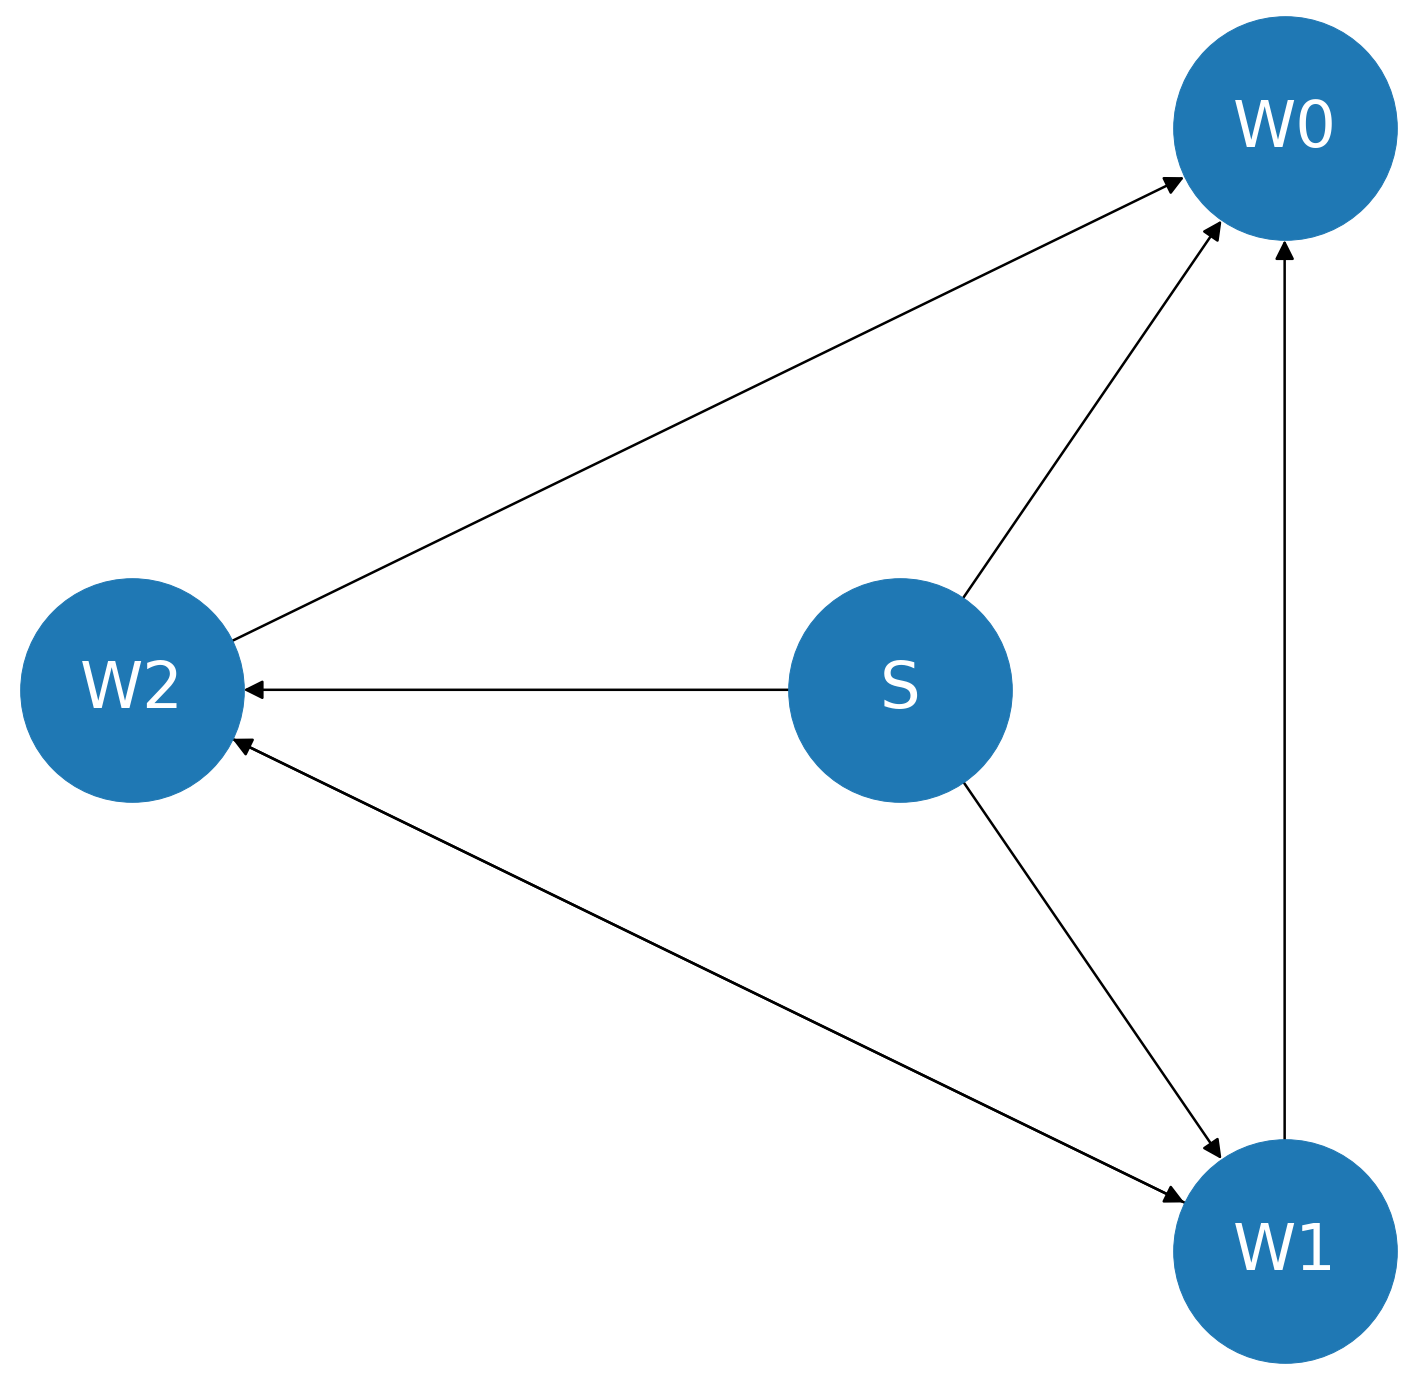

In [94]:
Visualize_Exploration(stoch_eval['map'], prog='twopi')
f = plt.gcf()
f.savefig('mdp3_map.pdf', bbox_inches='tight')

In [82]:
def TrainAndEvalMDP3(key, risk_level = 0.3, prog='neato'):
    MDP[key], fsm, cmdp = CreateSpecMDP3(reward_type = key, risk_level = risk_level)
    q_agent[key] = QLearningAgent(MDP[key])
    q_agent[key].explore(episode_limit = 1000, verbose = True)
    stoch_eval[key] = ExplorerAgent(MDP[key], input_policy=q_agent[key].create_learned_softmax_policy(0.02))
    stoch_eval[key].explore(episode_limit = 1000, verbose = True)
    Visualize_Exploration(stoch_eval[key], prog = prog)

Training episode 999         

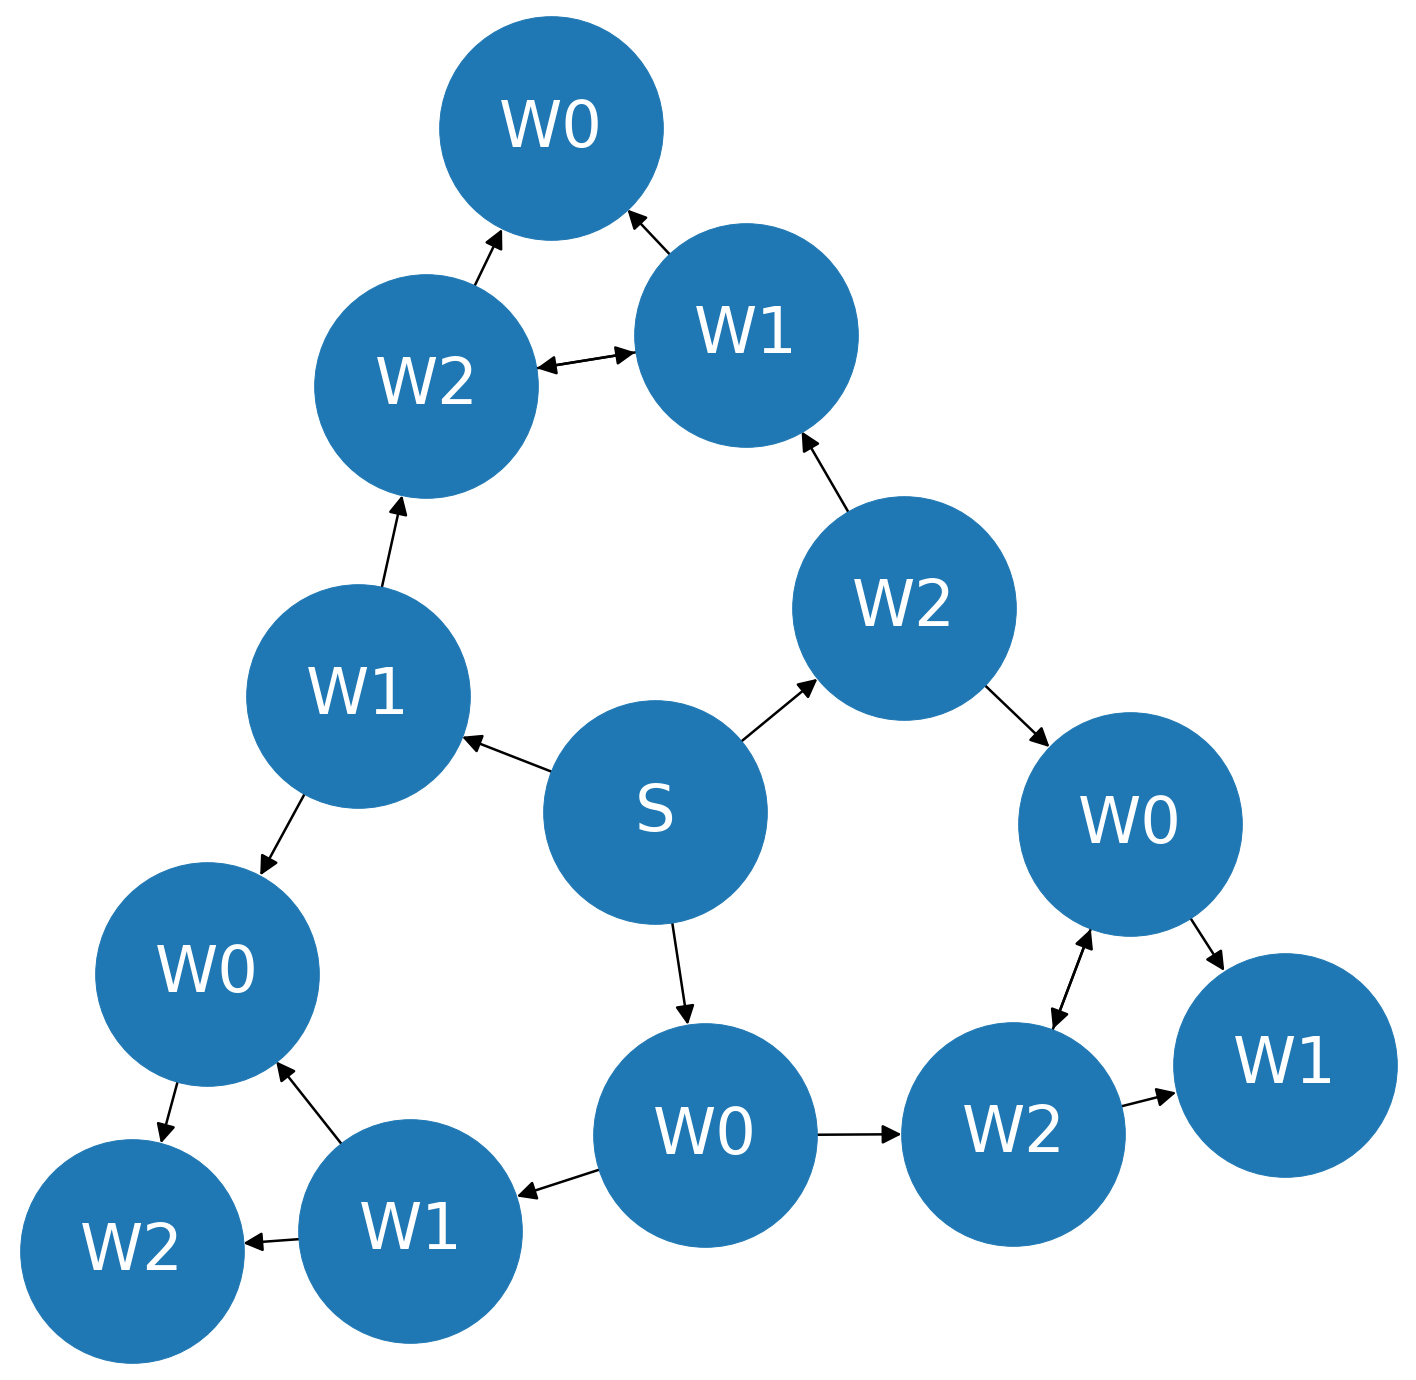

In [77]:


TrainAndEvalMDP3('min_regret')
f = plt.gcf()
f.savefig('mdp3_min_regret.pdf', bbox_inches='tight')

Training episode 999         

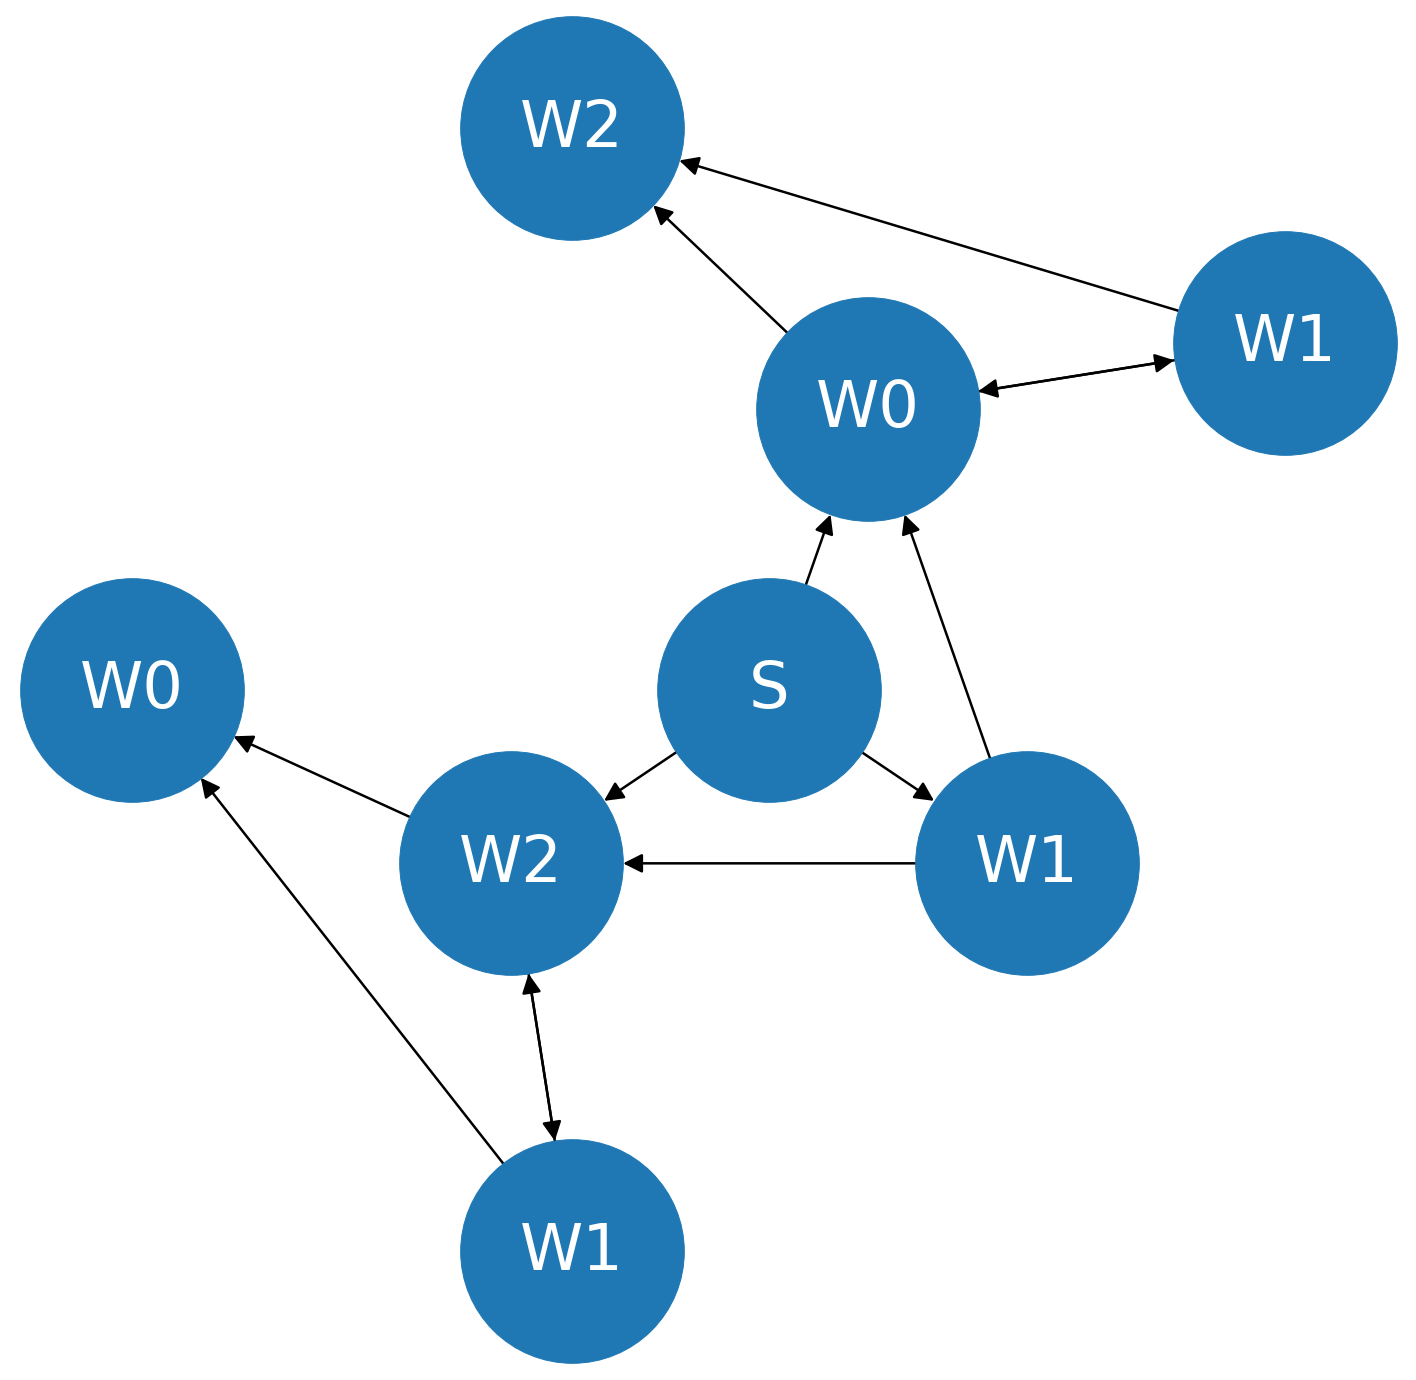

In [92]:
TrainAndEvalMDP3('chance_constrained',0.3, prog='twopi')
f = plt.gcf()
f.savefig('mdp3_cc.pdf', bbox_inches='tight')

In [95]:
_, fsm, cmdp = CreateSpecMDP3(reward_type = 'chance_constrained', risk_level=0.3)


In [99]:
fsm._all_probs

array([ 0.4 ,  0.35,  0.25])

In [105]:
MDP4 = {}
q_agent4 = {}
stoch_eval4 = {}

def TrainAndEvalMDP4(key, risk_level = 0.3, prog='neato'):
    MDP4[key], fsm, cmdp = CreateSpecMDP4(reward_type = key, risk_level = risk_level)
    q_agent4[key] = QLearningAgent(MDP4[key])
    q_agent4[key].explore(episode_limit = 1000, verbose = True)
    stoch_eval4[key] = ExplorerAgent(MDP4[key], input_policy=q_agent4[key].create_learned_softmax_policy(0.02))
    stoch_eval4[key].explore(episode_limit = 1000, verbose = True)
    Visualize_Exploration(stoch_eval4[key], prog = prog)

Training episode 499         

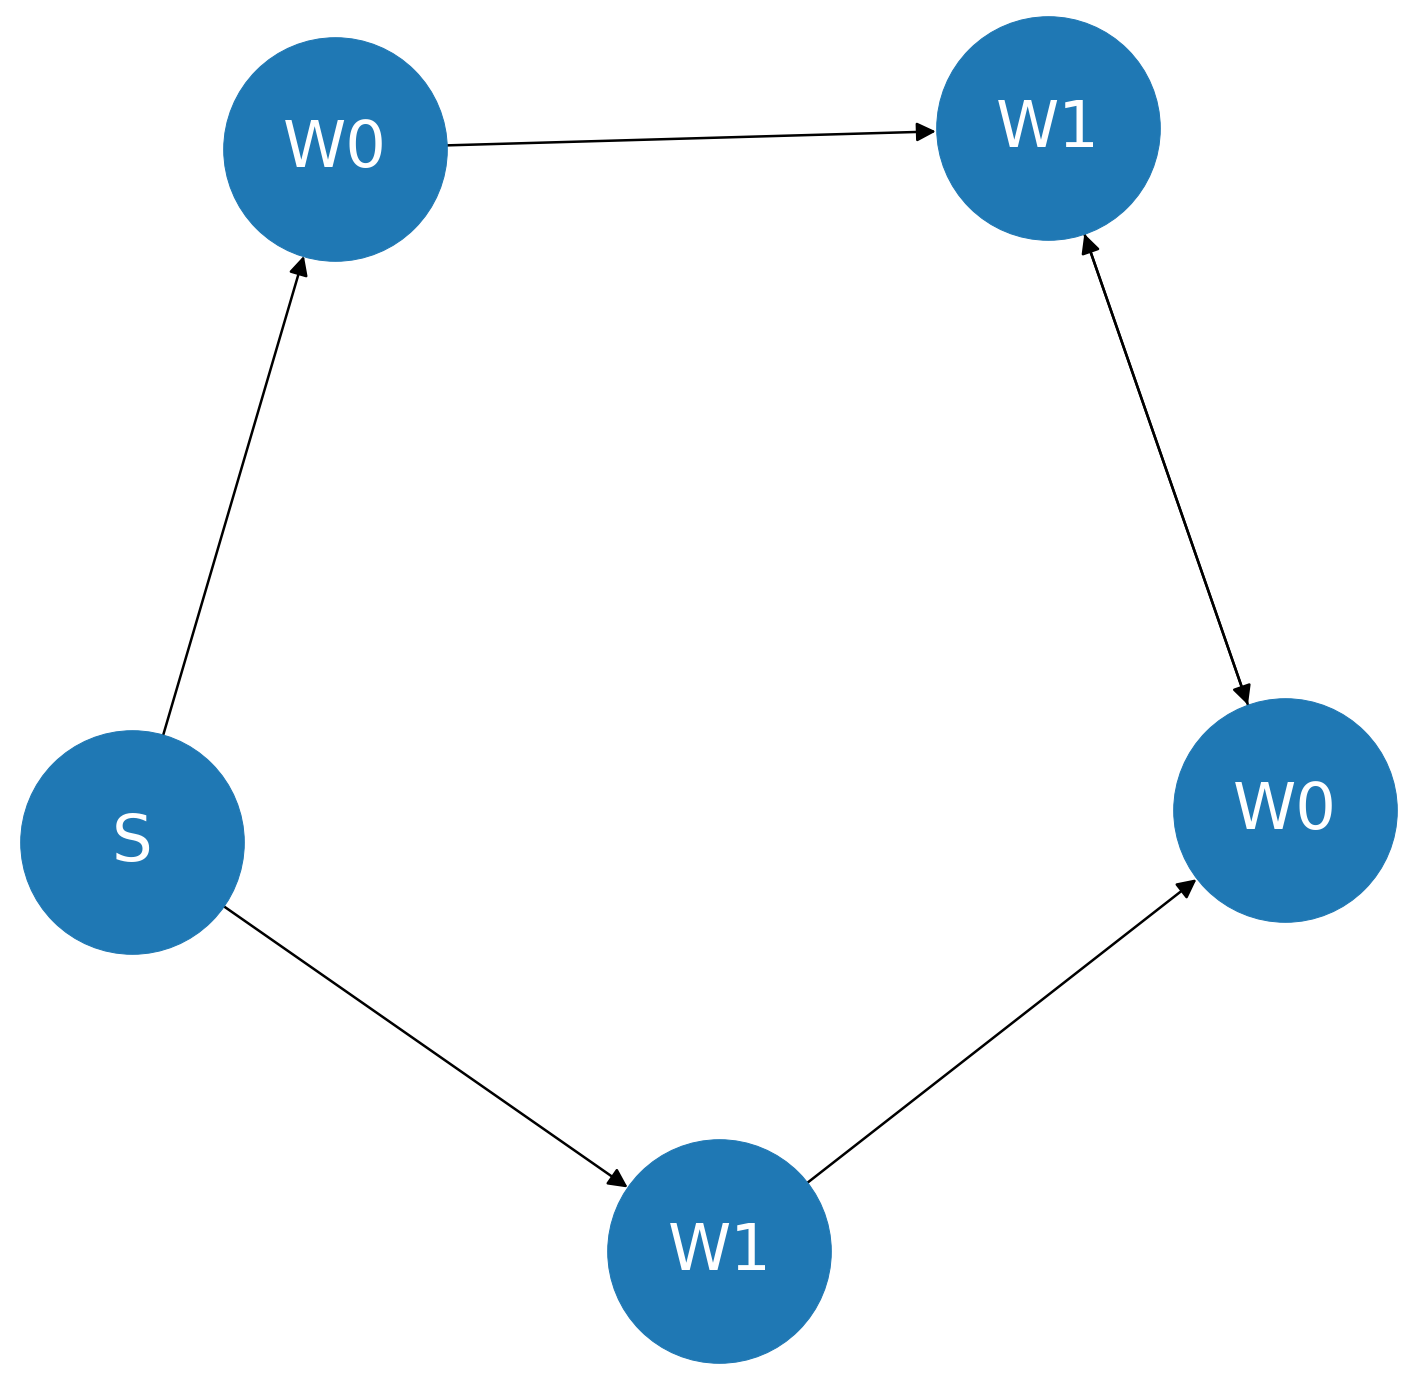

In [113]:

TrainAndEvalMDP4('max_cover')
f = plt.gcf()
f.savefig('mdp4_max.pdf', bbox_inces = 'tight')

Training episode 999         

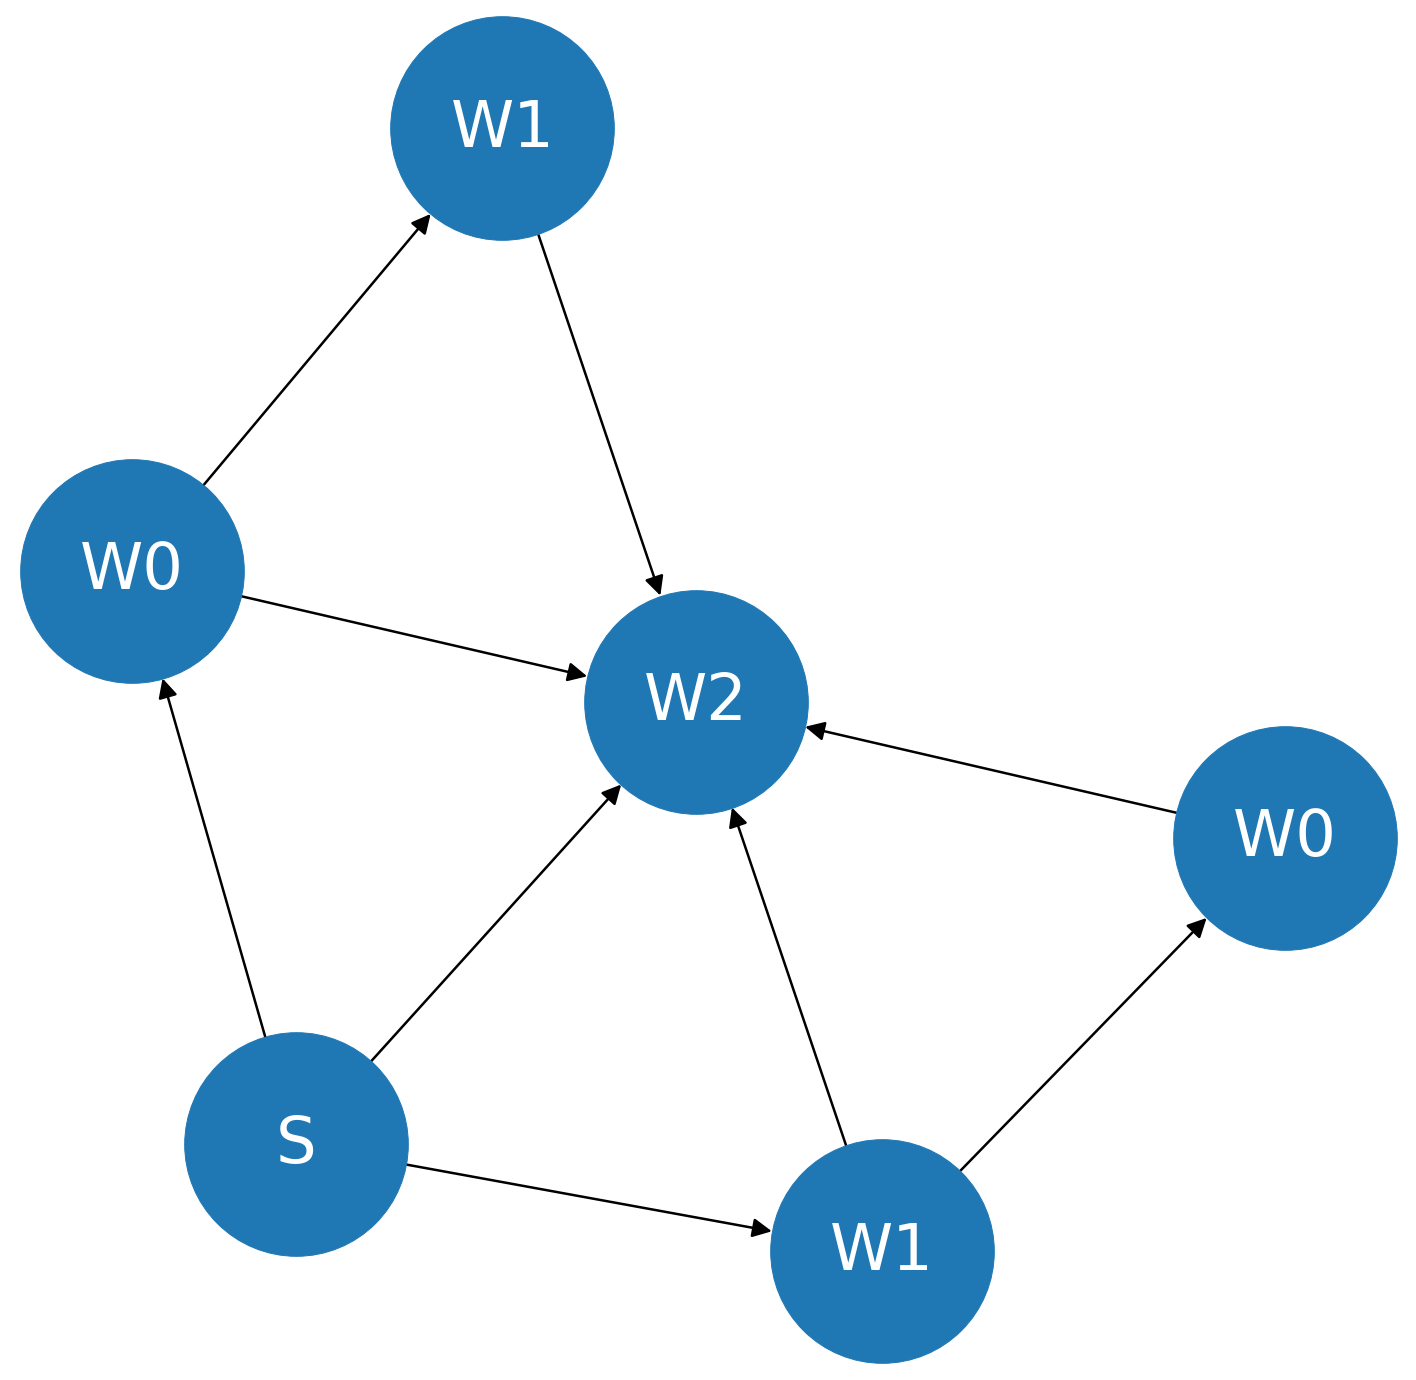

In [122]:
TrainAndEvalMDP4('min_regret')
f = plt.gcf()
f.savefig('mdp4_min_regret.pdf', bbox_inces = 'tight')

Training episode 999         

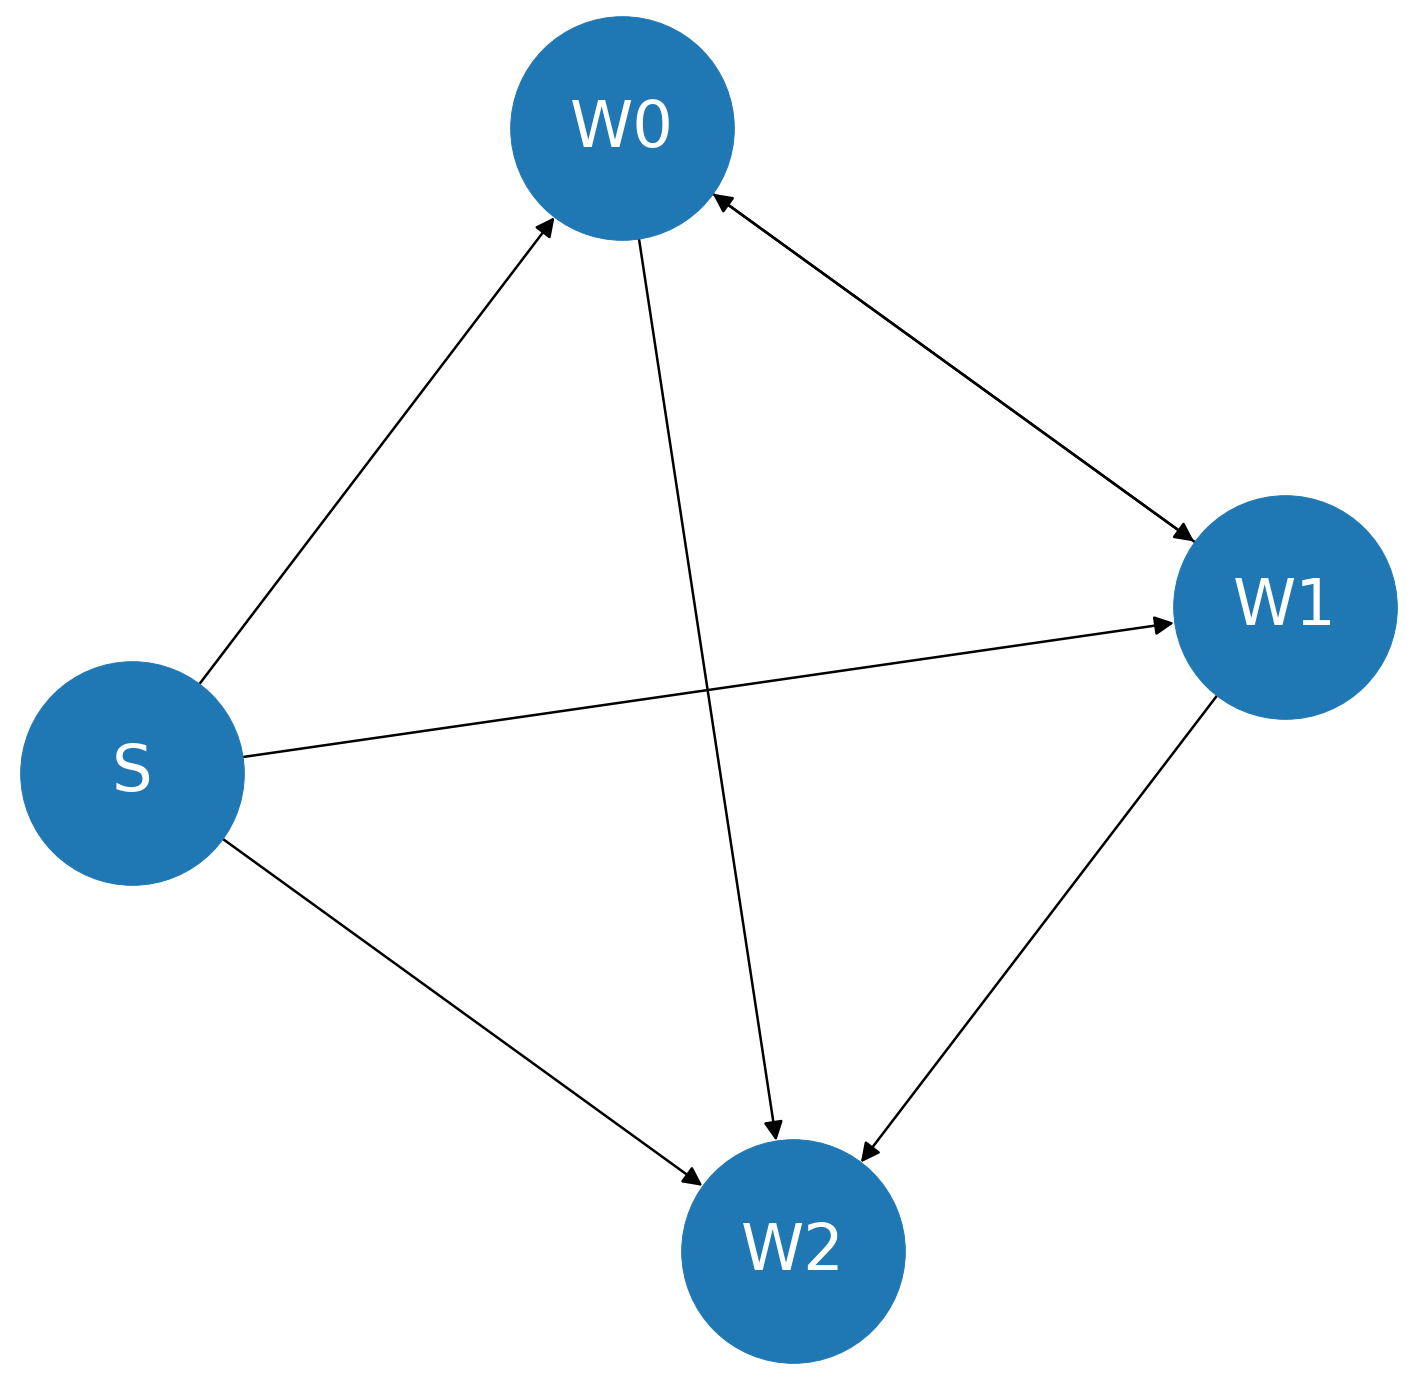

In [117]:
TrainAndEvalMDP4('map')
f = plt.gcf()
f.savefig('mdp4_map.pdf', bbox_inces = 'tight')

In [1]:
import pickle
Data = pickle.load(open('CFAgent_learning_curve.pkl','rb'))

In [2]:
LC_cf = Data['Learning_Curve']
rewards, mean_rewards, rewards_std, episodes = LC_cf
import seaborn as sns

In [3]:
fmri = sns.load_dataset('fmri')

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557
